In [58]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import networkx as nx

from timeit import default_timer as timer

from measure import generate_input
from kosaraju import kosaraju_algorithm

In [52]:
TRIES_PER_INPUT = 1
GRAPHS_PER_SIZE = 50

In [1]:
def measure_preformance(n, m) -> float:
	results = []
	for i in range(GRAPHS_PER_SIZE):
		edges = generate_input(n, m)
		tries_results = []
		for _ in range(TRIES_PER_INPUT):
			start = timer()
			kosaraju_algorithm(n, edges)
			end = timer()
			tries_results.append(end - start)
		results.append(np.min(tries_results))
	result = np.mean(results)
	return result

In [ ]:
n_values = range(10, 1000, 10)
m_values = range(10, 100, 10)
times = [[] for _ in n_values]
for i, n in enumerate(n_values):
	for m in m_values:
		edges = generate_input(n, m)
		start = timer()
		kosaraju_algorithm(n, edges)
		end = timer()
		times[i].append(end - start)

	# Calculate average times
	avg_times = [np.min(t) for t in times]

	# Convert lists to numpy arrays for easier manipulation
	n_values = np.array(n_values)
	avg_times = np.array(avg_times)

	# Plotting
	plt.figure(figsize=(10, 5))
	plt.plot(n_values, avg_times, label='Average Execution Time')
	plt.xlabel('Number of Nodes')
	plt.ylabel('Time (s)')
	plt.title('Performance of Kosaraju Algorithm')
	plt.legend()
	plt.grid(True)
	plt.show()

In [14]:
from toolz import sliding_window

In [15]:
fracs = [next / curr for curr, next in sliding_window(2, results)]
fracs

[1.8185565689912686,
 1.831211303679647,
 1.6911686065266538,
 1.6718719381545597,
 1.6348994396081642,
 1.9553810894513102,
 2.063594707934958,
 2.1265213531851845,
 2.074551977486969]

In [53]:
n_values = range(10, 1000, 10)
results_m_20 = [measure_preformance(n, 20) for n in tqdm(n_values)]

100%|██████████| 99/99 [00:02<00:00, 33.61it/s] 


In [54]:
results_m_100 = [measure_preformance(n, 100) for n in tqdm(n_values)]

100%|██████████| 99/99 [00:03<00:00, 31.93it/s] 


In [55]:
results_m_150 = [measure_preformance(n, 150) for n in tqdm(n_values)]

100%|██████████| 99/99 [00:03<00:00, 29.91it/s] 


In [56]:
results_m_300 = [measure_preformance(n, 300) for n in tqdm(n_values)]

100%|██████████| 99/99 [00:03<00:00, 25.80it/s]


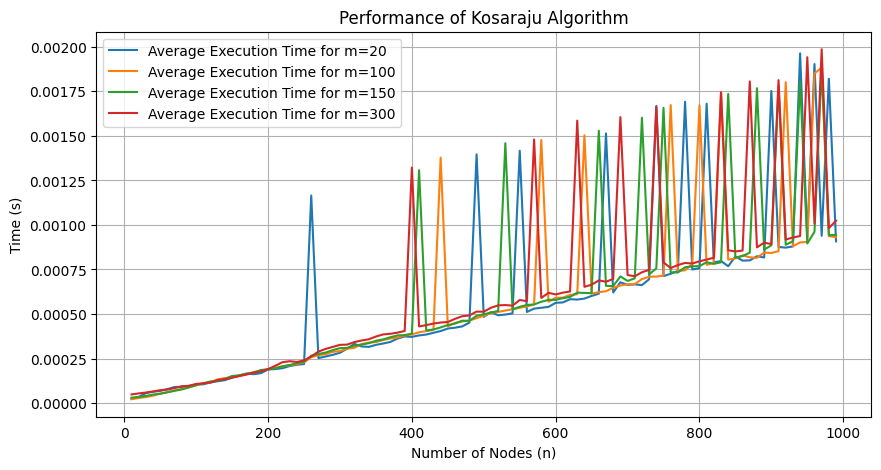

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(n_values, results_m_20, label=f'Average Execution Time for m=20')
plt.plot(n_values, results_m_100, label=f'Average Execution Time for m=100')
plt.plot(n_values, results_m_150, label=f'Average Execution Time for m=150')
plt.plot(n_values, results_m_300, label=f'Average Execution Time for m=300')
plt.xlabel('Number of Nodes (n)')
plt.ylabel('Time (s)')
plt.title('Performance of Kosaraju Algorithm')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
m_values = range(100, 2000, 10)

In [35]:
results_n_100 = [measure_preformance(100, m) for m in tqdm(m_values)]

100%|██████████| 190/190 [00:06<00:00, 27.40it/s]


In [36]:
results_n_200 = [measure_preformance(200, m) for m in tqdm(m_values)]

100%|██████████| 190/190 [00:08<00:00, 21.32it/s]


In [37]:
results_n_300 = [measure_preformance(300, m) for m in tqdm(m_values)]

100%|██████████| 190/190 [00:11<00:00, 16.19it/s]


In [38]:
results_n_1000 = [measure_preformance(1000, m) for m in tqdm(m_values)]

100%|██████████| 190/190 [00:38<00:00,  4.98it/s]


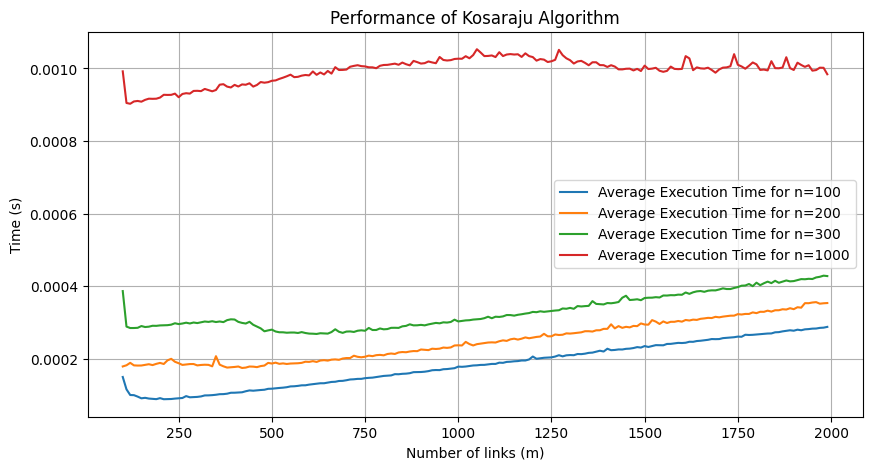

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(m_values, results_n_100, label=f'Average Execution Time for n=100')
plt.plot(m_values, results_n_200, label=f'Average Execution Time for n=200')
plt.plot(m_values, results_n_300, label=f'Average Execution Time for n=300')
plt.plot(m_values, results_n_1000, label=f'Average Execution Time for n=1000')
plt.xlabel('Number of links (m)')
plt.ylabel('Time (s)')
plt.title('Performance of Kosaraju Algorithm')
plt.legend()
plt.grid(True)
plt.show()

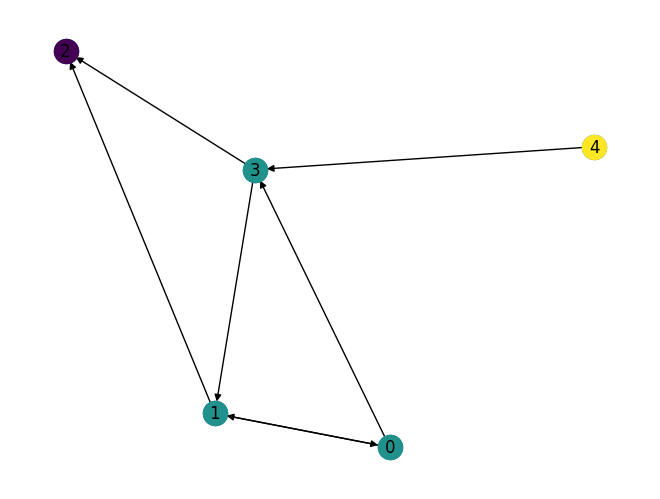

In [64]:
import networkx as nx
import matplotlib.pyplot as plt

# Количество вершин и ребер
n = 5
m = 7

# Генерация графа
G = nx.gnm_random_graph(n, m, directed=True)

# Нахождение компонент сильной связности
scc = list(nx.strongly_connected_components(G))

# Визуализация графа
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)

# Создание списка цветов
colors = plt.cm.viridis(np.linspace(0, 1, len(scc)))

# Визуализация компонент сильной связности разными цветами
for i, component in enumerate(scc):
    nx.draw_networkx_nodes(G, pos, nodelist=component, node_color=colors[i])

plt.show()